<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/RegresionLineal_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CLIENTE  CUENTA  VENTAS  CLIENTES_DESDE  EDAD GÉNERO
0        1     100       2            2020    35      M
1        2     200       4            2023    40      F
2        3     150       3            2021    45      M
3        4     300       6            2022    30      F
4        5     250       5            2018    25      M
5        6     125       8            2019    44      M
6        7     180       9            2017    51      F
7        8     220       7            2020    55      M
8        9     235       1            2021    58      F
Variables Independientes (X):
   VENTAS  CLIENTES_DESDE  EDAD
0       2            2020    35
1       4            2023    40
2       3            2021    45
3       6            2022    30
4       5            2018    25
5       8            2019    44
6       9            2017    51
7       7            2020    55
8       1            2021    58

Variable Dependiente (y):
0    100
1    200
2    150
3    300
4    250
5    125
6    180


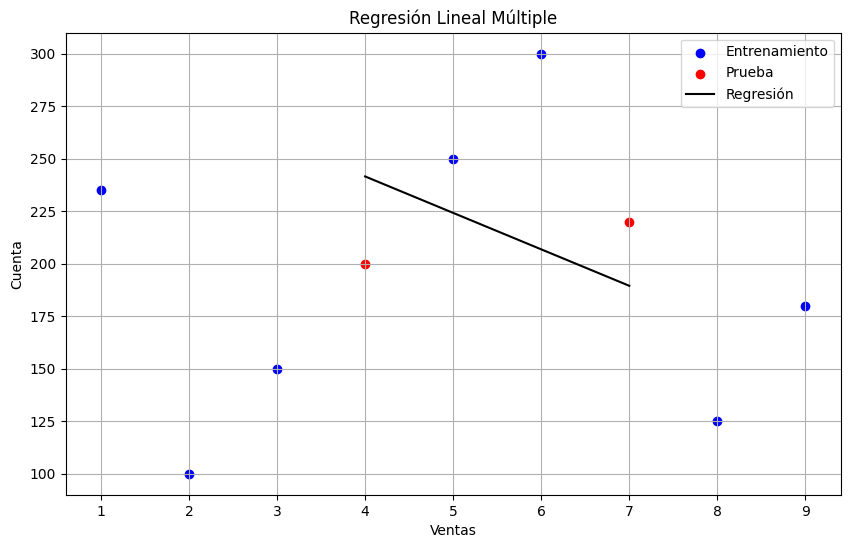

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

datos = [
    {"CLIENTE": 1, "CUENTA": 100, "VENTAS": 2, "CLIENTES_DESDE": 2020, "EDAD": 35, "GÉNERO": "M"},
    {"CLIENTE": 2, "CUENTA": 200, "VENTAS": 4, "CLIENTES_DESDE": 2023, "EDAD": 40, "GÉNERO": "F"},
    {"CLIENTE": 3, "CUENTA": 150, "VENTAS": 3, "CLIENTES_DESDE": 2021, "EDAD": 45, "GÉNERO": "M"},
    {"CLIENTE": 4, "CUENTA": 300, "VENTAS": 6, "CLIENTES_DESDE": 2022, "EDAD": 30, "GÉNERO": "F"},
    {"CLIENTE": 5, "CUENTA": 250, "VENTAS": 5, "CLIENTES_DESDE": 2018, "EDAD": 25, "GÉNERO": "M"},
    {"CLIENTE": 6, "CUENTA": 125, "VENTAS": 8, "CLIENTES_DESDE": 2019, "EDAD": 44, "GÉNERO": "M"},
    {"CLIENTE": 7, "CUENTA": 180, "VENTAS": 9, "CLIENTES_DESDE": 2017, "EDAD": 51, "GÉNERO": "F"},
    {"CLIENTE": 8, "CUENTA": 220, "VENTAS": 7, "CLIENTES_DESDE": 2020, "EDAD": 55, "GÉNERO": "M"},
    {"CLIENTE": 9, "CUENTA": 235, "VENTAS": 1, "CLIENTES_DESDE": 2021, "EDAD": 58, "GÉNERO": "F"}
]
#Visualizar tabla
df = pd.DataFrame(datos)
print(df)

#variables independientes y dependiente
x = df[['VENTAS', 'CLIENTES_DESDE', 'EDAD']]
y = df['CUENTA']

print("Variables Independientes (X):") #Predición
print(x)
print("\nVariable Dependiente (y):")
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) #
print("Variables Test:\n","x_test:\n",x_test,"\ny_test:\n", y_test)
print("Variables Entrenamiento:\n","x_train:\n",x_train,"\ny_train:\n", y_train)

 #Genera la regreción líneal (relación entre las variables predictoras y la variable objetivo)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#parámetro de estimación con el punto de corte
print(f"Punto de corte de nuestro algoritmo (Coeficiente WO): {lin_reg.intercept_}")
#Cálculo de coeficiente de Determinación (R2)
print(f"Coeficientes pendiente: {lin_reg.coef_ }")
print(f"Coeficientes pendiente W1: {lin_reg.coef_[0]}")
print(f"Coeficientes pendiente W2: {lin_reg.coef_[1]}")

#Predición de ventas
predicion = lin_reg.predict(x_test)
print(predicion)

#Calculo del error cuadrático (MSE) medio para evaluar la calidad del modelo
# Comparo las predicciones con los valores reales de las
# cuentas para las mismas filas
y_pred = predicion
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

#Cálculo de la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f"El valor de la raíz cuadrada de mse es rmse = {rmse}")
#Cálculo de coeficiente de Determinación (R2)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación es R2: {r2}")

#Creo el gráfico detallado
plt.figure(figsize=(10, 6))
#Gráfico de dispersión
plt.scatter(x_train['VENTAS'], y_train, linestyle='-', color='blue', label='Entrenamiento') #datos reales
plt.scatter(x_test['VENTAS'], y_test, color="red", label='Prueba')
#Línea de regresión aproximada
plt.plot(x_test['VENTAS'], y_pred, color="black", linestyle='-', label='Regresión')

#Etiquedado del gráfico
plt.xlabel('Ventas')
plt.ylabel('Cuenta')
plt.title('Regresión Lineal Múltiple') #nMSE y R2
plt.legend()
plt.grid(True)
plt.show()